# Data Transformation

## Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [4]:
df = pd.read_pickle('../Datos/df.pickle')
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiation
date,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   plant        136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_day       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambient    136472 non-null  float64
 8   t_module     136472 non-null  float64
 9   irradiation  136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.5+ MB


## Variables creation

In [6]:
def date_components (dataframe):
    month = dataframe.index.month
    day = dataframe.index.day
    hour = dataframe.index.hour
    minute = dataframe.index.minute

    return (pd.DataFrame({'month': month,
                          'day': day,
                          'hour': hour,
                          'minute': minute}))

In [8]:
df = pd.concat([df.reset_index(), date_components(df)], axis=1).set_index('date')
df

,plant,inverter_id,kw_dc,kw_ac,kw_day,kw_total,sensor_id,t_ambient,t_module,irradiation,month,day,hour,minute
date,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,5,15,0,0
2020-05-15 00:00:00,p1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,5,15,0,0
2020-05-15 00:00:00,p1,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,5,15,0,0
2020-05-15 00:00:00,p1,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,5,15,0,0
2020-05-15 00:00:00,p1,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,6,17,23,45
2020-06-17 23:45:00,p2,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,6,17,23,45
2020-06-17 23:45:00,p2,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,6,17,23,45


In [9]:
def inverter_efficiency(AC, DC):
    temp = AC / DC * 100
    return (temp.fillna(0))

In [11]:
df['efficiency'] = inverter_efficiency(df['kw_ac'], df['kw_dc'])

In [12]:
df.efficiency.isna().sum()

0

<Axes: ylabel='Density'>

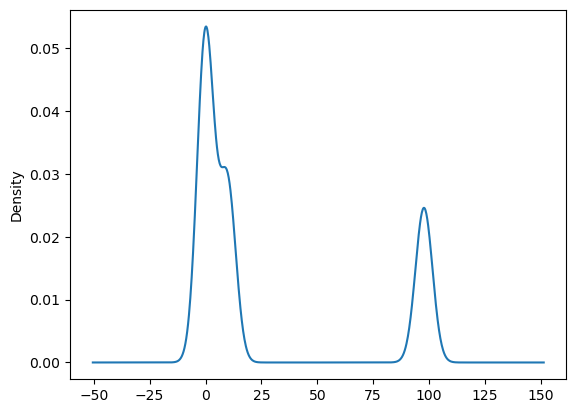

In [13]:
df.efficiency.plot.kde()

There are two clearly distinct groups, and one of them is clearly inefficient.

## Reorder the dataframe

In [16]:
order = orden = ['plant','month','day','hour','minute','sensor_id','irradiation','t_ambient','t_module','inverter_id','kw_dc','kw_ac','efficiency','kw_day','kw_total']

In [17]:
df = df[order]
df

,plant,month,day,hour,minute,sensor_id,irradiation,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
date,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.0,25.184316,22.857507,1BY6WEcLGh8j5v7,0.0,0.0,0.0,0.0,6259559.0
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.0,25.184316,22.857507,1IF53ai7Xc0U56Y,0.0,0.0,0.0,0.0,6183645.0
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.0,25.184316,22.857507,3PZuoBAID5Wc2HD,0.0,0.0,0.0,0.0,6987759.0
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.0,25.184316,22.857507,7JYdWkrLSPkdwr4,0.0,0.0,0.0,0.0,7602960.0
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.0,25.184316,22.857507,McdE0feGgRqW7Ca,0.0,0.0,0.0,0.0,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.0,23.202871,22.535908,q49J1IKaHRwDQnt,0.0,0.0,0.0,4157.0,520758.0
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.0,23.202871,22.535908,rrq4fwE8jgrTyWY,0.0,0.0,0.0,3931.0,121131356.0
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.0,23.202871,22.535908,vOuJvMaM2sgwLmb,0.0,0.0,0.0,4322.0,2427691.0


## Daily DF

In [34]:
df_day = df.groupby(['plant', 'inverter_id']).resample('D').agg({
    'irradiation': ['min', 'mean', 'max'],
    't_ambient': ['min', 'mean', 'max'],
    't_module': ['min', 'mean', 'max'],
    'kw_dc': ['min', 'mean', 'max', 'sum'],
    'kw_ac': ['min', 'mean', 'max', 'sum'],
    'efficiency': ['min', 'mean', 'max'],
    'kw_day': 'max',
    'kw_total': 'max'
})
df_day

irradiation                      t_ambient  \
                                         min      mean       max        min   
plant inverter_id     date                                                    
p1    1BY6WEcLGh8j5v7 2020-05-15         0.0  0.204699  0.893661  22.037482   
                      2020-05-16         0.0  0.211951  0.812241  21.496287   
                      2020-05-17         0.0  0.238869  0.997904  21.209418   
                      2020-05-18         0.0  0.159026  0.971481  20.961525   
                      2020-05-19         0.0  0.194031  0.835832  22.388784   
...                                      ...       ...       ...        ...   
p2    xoJJ8DcxJEcupym 2020-06-13         0.0  0.215523  0.927124  22.199287   
                      2020-06-14         0.0  0.229517  0.921356  23.651972   
                      2020-06-15         0.0  0.185053  0.829677  24.000265   
                      2020-06-16         0.0  0.165062  0.768459  23.629430   
                      2020-06-17         0.0  0.124383  0.578941  22.551586   

                                                         t_module             \
                                       mean        max        min       mean   
plant inverter_id     date                                                     
p1    1BY6WEcLGh8j5v7 2020-05-15  27.430823  34.430943  20.290726  32.582964   
                      2020-05-16  26.780538  32.524149  19.592692  31.858851   
                      2020-05-17  26.686727  35.252486  20.377121  32.740435   
                      2020-05-18  23.850938  28.367100  19.477531  27.814344   
                      2020-05-19  25.338021  30.368632  20.062144  29.725163   
...                                     ...        ...        ...        ...   
p2    xoJJ8DcxJEcupym 2020-06-13  26.116937  31.910203  20.875969  30.394871   
                      2020-06-14  27.019790  32.956087  22.117714  31.589834   
                      2020-06-15  26.557591  31.613734  22.997750  29.996233   
                      2020-06-16  26.369897  30.833513  22.555920  29.589896   
                      2020-06-17  24.852174  29.044236  21.908376  26.668631   

                                            kw_dc  ...                kw_ac  \
                                        max   min  ...            sum   min   
plant inverter_id     date                         ...                        
p1    1BY6WEcLGh8j5v7 2020-05-15  55.030613   0.0  ...  235340.696429   0.0   
                      2020-05-16  54.232746   0.0  ...  256629.875001   0.0   
                      2020-05-17  63.145582   0.0  ...  288039.821438   0.0   
                      2020-05-18  53.936739   0.0  ...  204030.303569   0.0   
                      2020-05-19  51.847742   0.0  ...  232277.267856   0.0   
...                                     ...   ...  ...            ...   ...   
p2    xoJJ8DcxJEcupym 2020-06-13  51.008646   0.0  ...   27443.737619   0.0   
                      2020-06-14  52.985789   0.0  ...   30768.782381   0.0   
                      2020-06-15  48.458500   0.0  ...   25597.239048   0.0   
                      2020-06-16  46.364629   0.0  ...   22335.691429   0.0   
                      2020-06-17  42.326256   0.0  ...   17640.415238   0.0   

                                                                         \
                                        mean          max           sum   
plant inverter_id     date                                                
p1    1BY6WEcLGh8j5v7 2020-05-15  247.812372  1039.350000  23046.550595   
                      2020-05-16  285.505580  1095.285714  25124.491072   
                      2020-05-17  293.467187  1114.814286  28172.850000   
                      2020-05-18  208.026116  1193.628571  19970.507143   
                      2020-05-19  244.528783  1059.800000  22741.176786   
...                                      ...          ...           ...   
p2    xoJJ8DcxJEcupym 2

In [35]:
tuples = df_day.columns.to_flat_index()
df_day.columns = ['_'.join(col) for col in tuples]
df_day

irradiation_min  irradiation_mean  \
plant inverter_id     date                                            
p1    1BY6WEcLGh8j5v7 2020-05-15              0.0          0.204699   
                      2020-05-16              0.0          0.211951   
                      2020-05-17              0.0          0.238869   
                      2020-05-18              0.0          0.159026   
                      2020-05-19              0.0          0.194031   
...                                           ...               ...   
p2    xoJJ8DcxJEcupym 2020-06-13              0.0          0.215523   
                      2020-06-14              0.0          0.229517   
                      2020-06-15              0.0          0.185053   
                      2020-06-16              0.0          0.165062   
                      2020-06-17              0.0          0.124383   

                                  irradiation_max  t_ambient_min  \
plant inverter_id     date                                         
p1    1BY6WEcLGh8j5v7 2020-05-15         0.893661      22.037482   
                      2020-05-16         0.812241      21.496287   
                      2020-05-17         0.997904      21.209418   
                      2020-05-18         0.971481      20.961525   
                      2020-05-19         0.835832      22.388784   
...                                           ...            ...   
p2    xoJJ8DcxJEcupym 2020-06-13         0.927124      22.199287   
                      2020-06-14         0.921356      23.651972   
                      2020-06-15         0.829677      24.000265   
                      2020-06-16         0.768459      23.629430   
                      2020-06-17         0.578941      22.551586   

                                  t_ambient_mean  t_ambient_max  t_module_min  \
plant inverter_id     date                                                      
p1    1BY6WEcLGh8j5v7 2020-05-15       27.430823      34.430943     20.290726   
                      2020-05-16       26.780538      32.524149     19.592692   
                      2020-05-17       26.686727      35.252486     20.377121   
                      2020-05-18       23.850938      28.367100     19.477531   
                      2020-05-19       25.338021      30.368632     20.062144   
...                                          ...            ...           ...   
p2    xoJJ8DcxJEcupym 2020-06-13       26.116937      31.910203     20.875969   
                      2020-06-14       27.019790      32.956087     22.117714   
                      2020-06-15       26.557591      31.613734     22.997750   
                      2020-06-16       26.369897      30.833513     22.555920   
                      2020-06-17       24.852174      29.044236     21.908376   

                                  t_module_mean  t_module_max  kw_dc_min  ...  \
plant inverter_id     date                                                ...   
p1    1BY6WEcLGh8j5v7 2020-05-15      32.582964     55.030613        0.0  ...   
                      2020-05-16      31.858851     54.232746        0.0  ...   
                      2020-05-17      32.740435     63.145582        0.0  ...   
                      2020-05-18      27.814344     53.936739        0.0  ...   
                      2020-05-19      29.725163     51.847742        0.0  ...   
...                                         ...           ...        ...  ...   
p2    xoJJ8DcxJEcupym 2020-06-13      30.394871     51.008646        0.0  ...   
                      2020-06-14      31.589834     52.985789        0.0  ...   
                      2020-06-15      29.996233     48.458500        0.0  ...   
                      2020-06-16      29.589896     46.364629        0.0  ...   
                      2020-06-17      26.668631     42.326256        0.0  ...   

                                      kw_dc_sum  kw_ac_min  kw_ac_mean  \
plant inverter_id     date                 

In [39]:
#df_day = df.day.reset_inde
df_day = df_day.reset_index().set_index('date')
df_day

,plant,inverter_id,irradiation_min,irradiation_mean,irradiation_max,t_ambient_min,t_ambient_mean,t_ambient_max,t_module_min,t_module_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,efficiency_min,efficiency_mean,efficiency_max,kw_day_max,kw_total_max
date,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.0,0.204699,0.893661,22.037482,27.430823,34.430943,20.290726,32.582964,...,235340.696429,0.0,247.812372,1039.350000,23046.550595,0.0,5.258029,9.823548,5754.000000,6265313.0
2020-05-16,p1,1BY6WEcLGh8j5v7,0.0,0.211951,0.812241,21.496287,26.780538,32.524149,19.592692,31.858851,...,256629.875001,0.0,285.505580,1095.285714,25124.491072,0.0,5.555110,9.828622,6292.000000,6271605.0
2020-05-17,p1,1BY6WEcLGh8j5v7,0.0,0.238869,0.997904,21.209418,26.686727,35.252486,20.377121,32.740435,...,288039.821438,0.0,293.467187,1114.814286,28172.850000,0.0,4.987913,9.824094,7045.000000,6278650.0
2020-05-18,p1,1BY6WEcLGh8j5v7,0.0,0.159026,0.971481,20.961525,23.850938,28.367100,19.477531,27.814344,...,204030.303569,0.0,208.026116,1193.628571,19970.507143,0.0,4.989864,9.830864,4998.000000,6283648.0
2020-05-19,p1,1BY6WEcLGh8j5v7,0.0,0.194031,0.835832,22.388784,25.338021,30.368632,20.062144,29.725163,...,232277.267856,0.0,244.528783,1059.800000,22741.176786,0.0,4.628925,9.831315,6449.000000,6290097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.0,0.215523,0.927124,22.199287,26.116937,31.910203,20.875969,30.394871,...,27443.737619,0.0,279.589350,1239.953333,26840.577619,0.0,51.910797,98.288081,6632.000000,209312200.0
2020-06-14,p2,xoJJ8DcxJEcupym,0.0,0.229517,0.921356,23.651972,27.019790,32.956087,22.117714,31.589834,...,30768.782381,0.0,313.426766,1328.213333,30088.969524,0.0,51.944580,99.916122,7268.000000,209319687.0
2020-06-15,p2,xoJJ8DcxJEcupym,0.0,0.185053,0.829677,24.000265,26.557591,31.613734,22.997750,29.996233,...,25597.239048,0.0,260.932183,1256.671429,25049.489524,0.0,52.944501,98.269932,7412.666667,209325949.0


## Save Data

In [40]:
df.to_pickle('../Datos/df.pickle')
df_day.to_pickle('../Datos/df_day.pickle')